In [1]:
#imports
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import pandas as pd
digits = load_digits()
#(prints rows, columns)
print(digits.data.shape)
print(digits.keys())
print(digits)

(1797, 64)
dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])
{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]]), 'target': array([0, 1, 2, ..., 8, 9, 8]), 'frame': None, 'feature_names': ['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pi

Each datapoint is a 8x8 image of a digit.

Classes - 10\
Samples per class ~180\
Samples total - 1797\
Dimensionality - 64\
Features - integers 0-16

<Figure size 640x480 with 0 Axes>

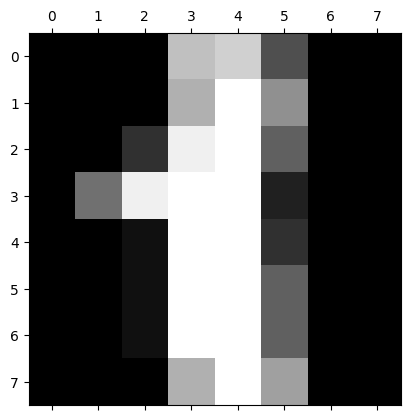

Target 1


In [2]:
# IMAGE - of digit 1
plt.gray()
plt.matshow(digits.images[1])
plt.show()
# TARGET - 2
print ('Target', digits.target[1])

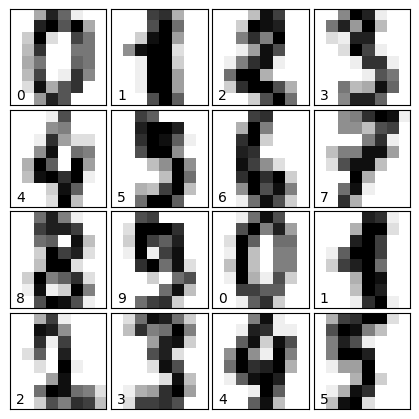

In [3]:
# How the images of handwritten digits look like (No need to copy this code)
fig = plt.figure(figsize=(4, 4))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(16):
    ax = fig.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')

    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))

In [4]:
#split data into train and test (75% train 25% test)
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(digits.data, digits.target, test_size=0.25,
                                                random_state=0)


In [5]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, max_depth=10)#n_estimators means 100 trees in our forest, max depth=10 means a tree has 10 levels
model.fit(Xtrain, ytrain)

RandomForestClassifier(max_depth=10)

In [6]:
#our model is now trained, now we will use it on our test data
ypred = model.predict(Xtest)

In [7]:
#tells how the model classified numbers
pd.crosstab(ypred,ytest)

col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,37,0,1,0,0,0,0,0,0,0
1,0,41,0,0,0,0,1,0,1,0
2,0,0,42,0,0,0,0,0,0,0
3,0,0,1,44,0,0,0,0,0,0
4,0,0,0,0,37,0,0,0,0,0
5,0,1,0,0,0,46,0,0,0,1
6,0,0,0,0,0,0,51,0,0,0
7,0,0,0,0,1,0,0,48,0,0
8,0,0,0,1,0,0,0,0,47,0


In [8]:
#find how accurate our model is
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(ytest, ypred))

Accuracy: 0.9755555555555555
